In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets
import pandas as pd

In [ ]:
iris = datasets.load_iris()
X=iris.data
Y=iris.target
labels=iris.target_names
label_dict={0:labels[0],1:labels[1],2:labels[2]}
label_dict

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

In [ ]:
mean_vectors=[]
for cl in range(0,3):
  mean_vectors.append(np.mean(X[Y==cl],axis=0))
  print(f"Mean vector class {cl+1}: {mean_vectors[cl]}\n")


Mean vector class 1: [5.006 3.428 1.462 0.246]

Mean vector class 2: [5.936 2.77  4.26  1.326]

Mean vector class 3: [6.588 2.974 5.552 2.026]



In [ ]:
S_w = np.zeros((4,4))
for cl,mv in zip(range(0,3),mean_vectors):
  # general scatter matrix filled with 0s
  class_sc_mat = np.zeros((4,4))
  # for every row where class corresponds to respective iteration
  for row in X[Y==cl]:
    # column vectors
    # reshaping from 1x4 to 4x1
    row,mv = row.reshape(4,1),mv.reshape(4,1)
    # scatter matrix for every class
    class_sc_mat += (row-mv).dot((row-mv).T)
  # sum scatter matrices
  S_w += class_sc_mat

print("Within class scatter matrix:\n",S_w)

Within class scatter matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [ ]:
np.set_printoptions(precision=4)
# between class scatter matrices
overall_mean = np.mean(X,axis=0)
S_b = np.zeros((4,4))
# for every iteration in the mean vectors
for i,mean_vec in enumerate(mean_vectors):
  # no of samples per class
  n = X[Y==i,:].shape[0]
  # reshaping from 1x4 to 4x1
  mean_vec = mean_vec.reshape(4,1)
  overall_mean = overall_mean.reshape(4,1)
  S_b += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
print('Between-class Scatter Matrix:\n', S_b)

Between-class Scatter Matrix:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
for i in range(len(eigenvalues)):
  eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
  print(f"Eigenvector {i+1}: \n{eigenvectors_sc}\n")
  print(f"Eigenvalue {i+1}: \n{eigenvalues[i]}\n")

Eigenvector 1: 
[[-0.2087+0.j]
 [-0.3862+0.j]
 [ 0.554 +0.j]
 [ 0.7074+0.j]]

Eigenvalue 1: 
(32.191929198278025+0j)

Eigenvector 2: 
[[-0.0065+0.j]
 [-0.5866+0.j]
 [ 0.2526+0.j]
 [-0.7695+0.j]]

Eigenvalue 2: 
(0.28539104262306647+0j)

Eigenvector 3: 
[[-0.1416+0.5257j]
 [-0.2125-0.2304j]
 [-0.2703-0.2289j]
 [ 0.6927+0.j    ]]

Eigenvalue 3: 
(-2.8907453147977534e-15+2.365998256149152e-15j)

Eigenvector 4: 
[[-0.1416-0.5257j]
 [-0.2125+0.2304j]
 [-0.2703+0.2289j]
 [ 0.6927-0.j    ]]

Eigenvalue 4: 
(-2.8907453147977534e-15-2.365998256149152e-15j)



In [ ]:
# Av= λv
for i in range(len(eigenvalues)):
  eigenvectors_sc = eigenvectors[:,i].reshape(4,1)
  np.testing.assert_array_almost_equal(np.linalg.inv(S_w).dot(S_b).dot(eigenvectors_sc),eigenvalues[i] * eigenvectors_sc,
          decimal=6,err_msg='',verbose=True)
  print(f"ok {i+1}")

ok 1
ok 2
ok 3
ok 4


In [ ]:
# eigenvector + its corresponding value
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
print('Eigenvalues in decreasing order:\n')
for i in eigen_pairs:
  print(i[0])

Eigenvalues in decreasing order:

32.191929198278025
0.28539104262306647
3.7355530009793716e-15
3.7355530009793716e-15


In [ ]:
print("Variance explained: \n")
eig_val_sc = [(i/sum(eigenvalues))*100 for i in sorted(eigenvalues,reverse=True)]
for i in range(0,4):
  print(f"Eigenvalue {i+1}: {eig_val_sc[i].real:.2f}%")

Variance explained: 

Eigenvalue 1: 99.12%
Eigenvalue 2: 0.88%
Eigenvalue 3: -0.00%
Eigenvalue 4: -0.00%


In [ ]:
# eigenvector matrix 4x2 (4 features, 2 important eigenvectors)
W = np.hstack((eigen_pairs[0][1].reshape(4,1),eigen_pairs[1][1].reshape(4,1)))
print("Matrix W:\n",W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


In [ ]:
# Y=X x W (X-matrix with original iris.data)
X_lda=X.dot(W)

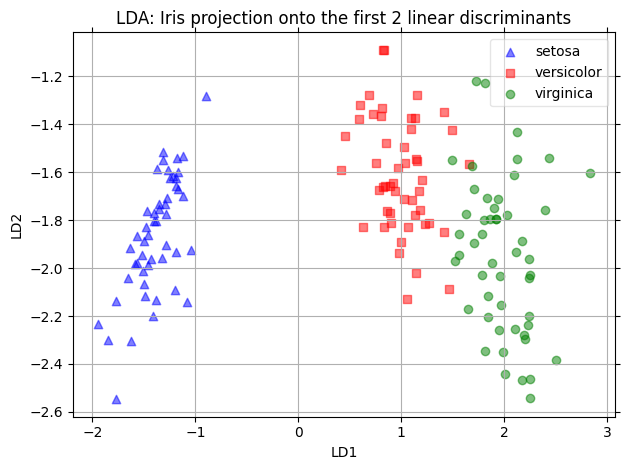

In [ ]:
def plot_step_lda():
  ax = plt.subplot()
  for label, marker, color in zip(
      range(0,3),("^","s","o"),("blue","red","green")):
      plt.scatter(x=X_lda[:,0].real[Y==label],
                    y=X_lda[:,1].real[Y==label],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  leg = plt.legend(loc='upper right', fancybox=True)
  leg.get_frame().set_alpha(0.5)
  plt.title('LDA: Iris projection onto the first 2 linear discriminants')
  plt.tick_params(axis="both", which="both", bottom="off", top="off",
                  labelbottom="on", left="off", right="off", labelleft="on")
  plt.grid()
  plt.tight_layout()
  plt.show()

plot_step_lda()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X=iris.data
Y=iris.target
clf=LDA()
clf.fit_transform(X,Y)
clf.predict(X)
# mean accuracy
clf.score(X,Y)

0.98

In [ ]:
# mean vectors
clf.means_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [ ]:
# prior probabilities (equal numbers for 3 categories in dataset)
clf.priors_

array([0.3333, 0.3333, 0.3333])

In [ ]:
clf.coef_

array([[  6.3148,  12.1393, -16.9464, -20.7701],
       [ -1.5312,  -4.376 ,   4.6957,   3.0626],
       [ -4.7836,  -7.7633,  12.2508,  17.7075]])

In [ ]:
clf.explained_variance_ratio_

array([0.9912, 0.0088])

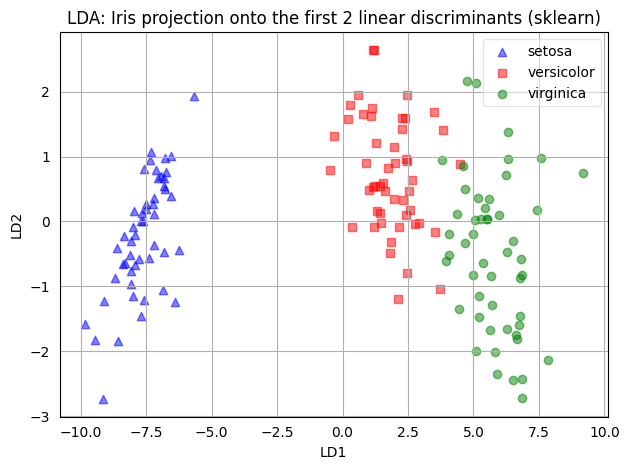

In [ ]:
def plot_step_lda(X_lda, Y, label_dict):
    ax = plt.subplot()
    for label, marker, color in zip(
        range(0,3),("^","s","o"),("blue","red","green")):
        plt.scatter(
            x=X_lda[:,0][Y==label]*(-1), #-v
            y=X_lda[:,1][Y==label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
        )
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants (sklearn)')
    plt.tick_params(axis="both", which="both", bottom=False, top=False,
                    labelbottom=True, left=False, right=False, labelleft=True)
    plt.grid()
    plt.tight_layout()
    plt.show()


plot_step_lda(X_lda, Y, label_dict)
